In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/nuwa_cluster/home/jackyu/locally_installed_python_pacakges/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'planck_wgt_flux',
            'option_wgt',
            'fac_meank',
            'klin']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [52]:
analysis = scripts.Analysis()

In [53]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu/radiation',
              'crd/LW/examples/separate_g_groups',
              'study__lblnew_g1_threshold',
              'co2',
              'band03b_wn_620_720',
              'ng_7',
              'g_descending',
              'refPTs_P_1_T_250__P_10_T_250',
              'ng_refs_5__2',
              'getabsth_auto__auto__auto',
              'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
              'wgt_0_.6_.5_.7_.8__all.8_.7',
              'bigsum',
              'option_wgt_1',
              'dv_.001',
              'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [54]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu/radiation',
              'crd/LW/examples/separate_g_groups',
              'study__lblnew_g1_threshold',
              'co2',
              'band03b_wn_620_720',
              'ng_7',
              'g_descending',
              'refPTs_P_1_T_250__P_10_T_250',
              'ng_refs_5__2',
              'getabsth_auto__auto__auto',
              'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
              'wgt_0_.6_.5_.7_.8__all.8_.7',
              'bigsum',
              'option_wgt_1',
              'dv_.001',
              'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [55]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(range(1, 7 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-2, 200)

fig.set_pressure_displayrange(low=1e-2)

In [56]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [57]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [58]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [59]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 620

nband = 100

nv = 1000

dv = 0.001

tsfc = 294.0

ng = 7

nref = 2

p_refs = (/ 1,  10 /)

t_refs = (/ 250, 250 /)

ng_refs = (/ 5,   2 /)

data wgt
     &     /.7, .8, .8, .7, .5, .6, 0/

planck_wgt_flux = 2

option_wgt = 1

include 'mls75.pro'


In [60]:
fig.display_hrefanchor()

In [35]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [36]:
table_dgdgs.display_hrefanchor()

In [37]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [38]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [39]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

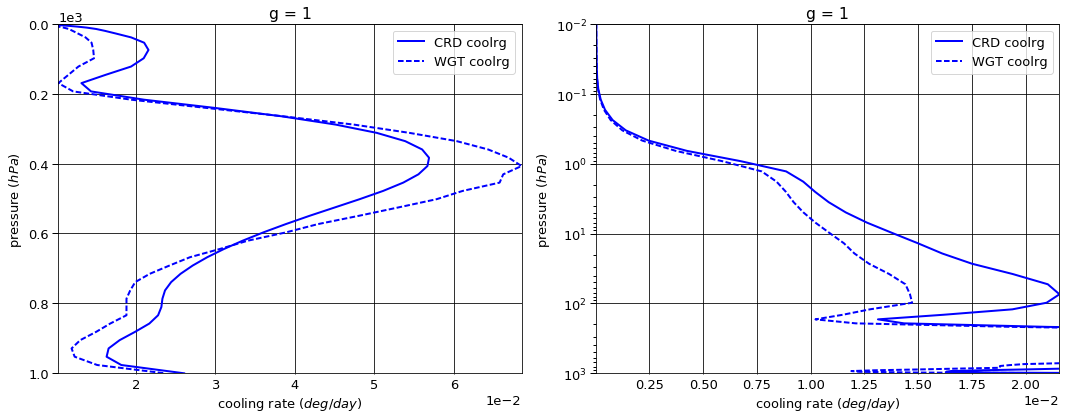

# Figure: cooling rate g-group 2

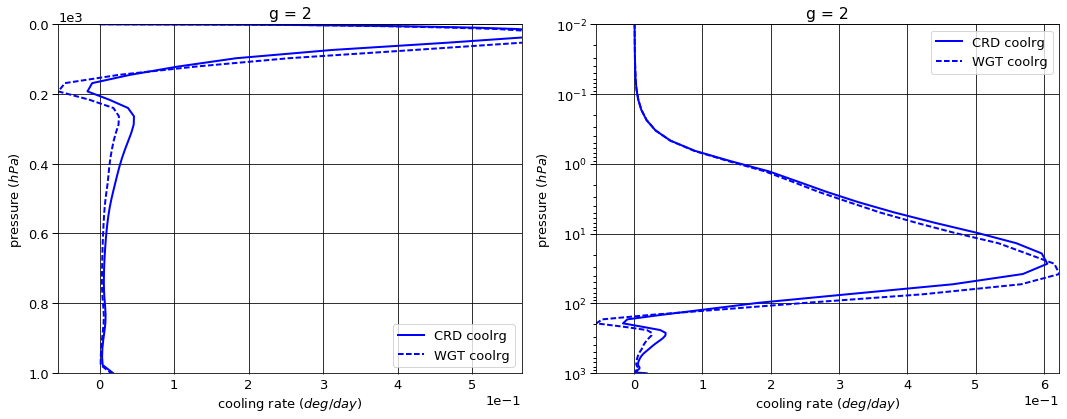

# Figure: cooling rate g-group 3

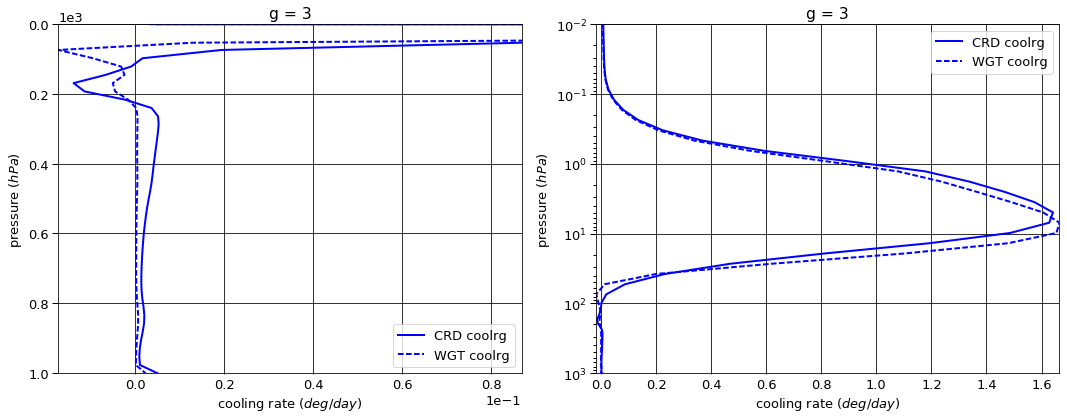

# Figure: cooling rate g-group 4

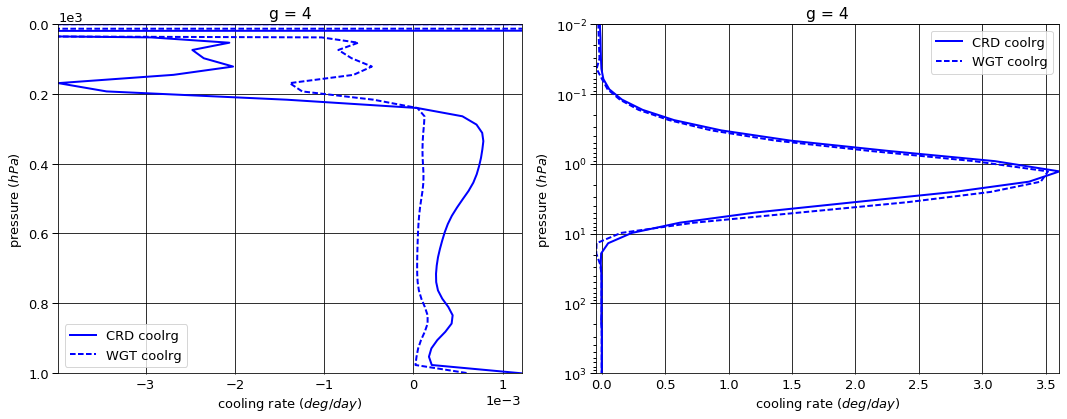

# Figure: cooling rate g-group 5

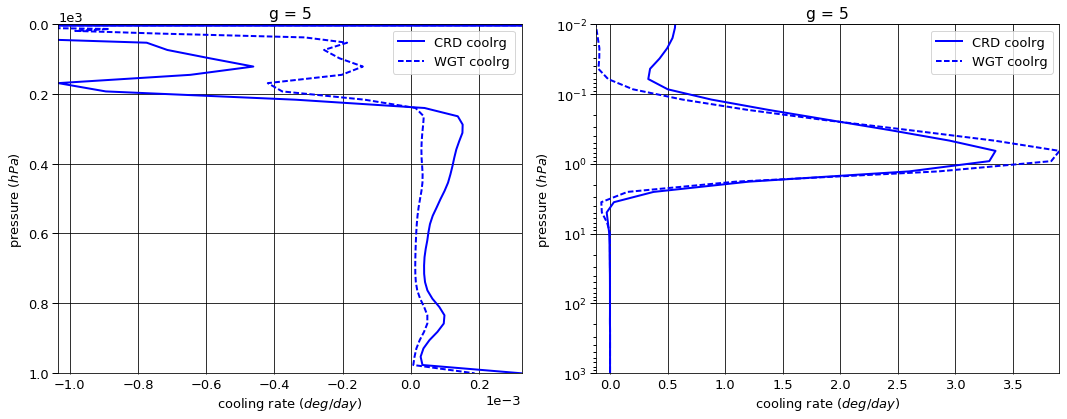

# Figure: cooling rate g-group 6

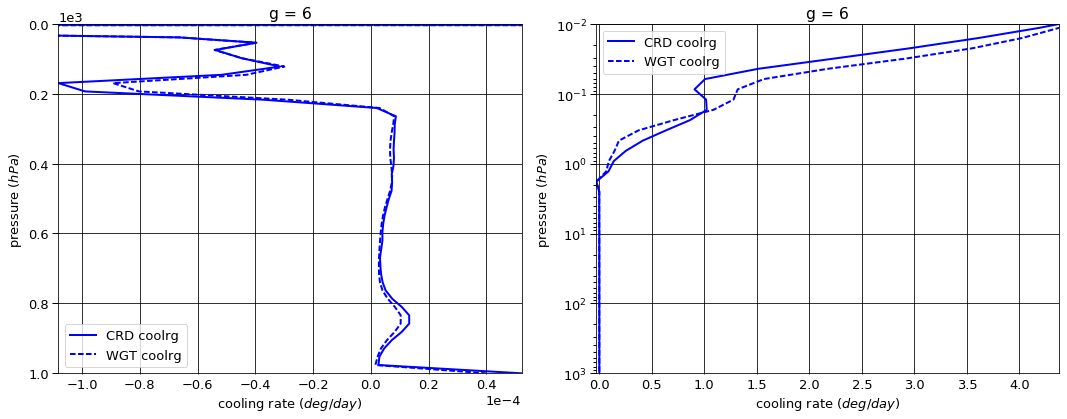

# Figure: cooling rate g-group 7

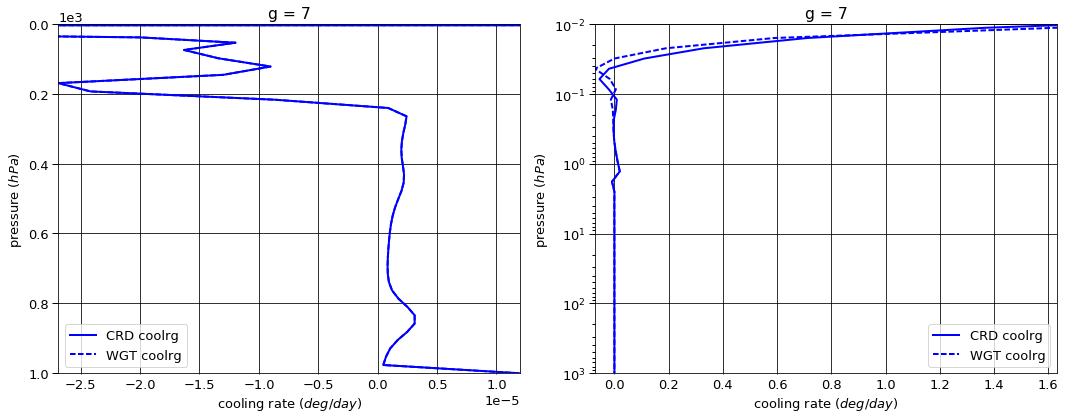

# Figure: cooling rate g-group total

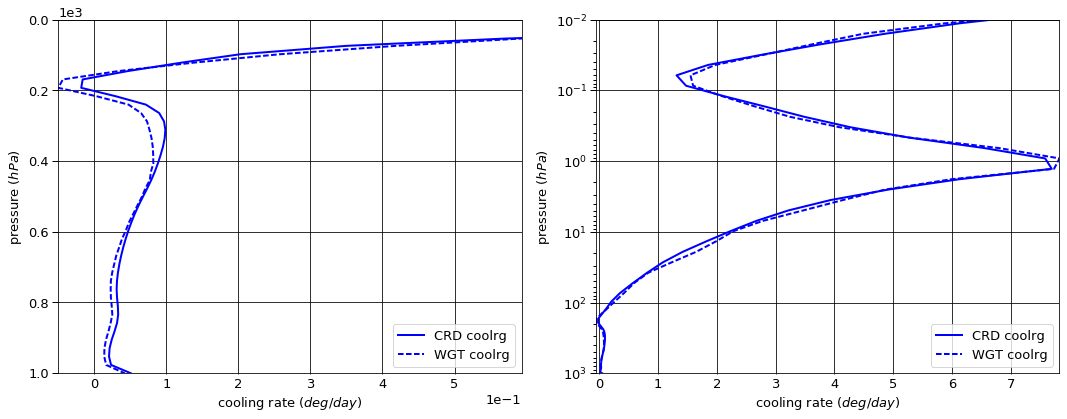

In [61]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [41]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg     fnetg
g pressure level                                
1 0.0      1      -3.969910   0.000000 -3.969910
  1013.0   76     -8.432207   8.206954 -0.225253
2 0.0      1      -7.098062   0.000000 -7.098062
  1013.0   76    -20.794335  20.731171 -0.063164
3 0.0      1      -4.464770   0.000000 -4.464770
  1013.0   76    -10.707804  10.689235 -0.018569
4 0.0      1      -1.709596   0.000000 -1.709596
  1013.0   76     -2.906766   2.902671 -0.004095
5 0.0      1      -0.561861   0.000000 -0.561861
  1013.0   76     -0.879953   0.878994 -0.000960
6 0.0      1      -0.071685   0.000000 -0.071685
  1013.0   76     -0.187351   0.187204 -0.000147
7 0.0      1      -0.015317   0.000000 -0.015317
  1013.0   76     -0.056422   0.056389 -0.000033


WGT


flug       fldg     fnetg
g pressure level                                
1 0.0      1      -3.887501   0.000000 -3.887501
  1013.0   76     -8.432207   8.296141 -0.136066
2 0.0      1      -6.856877   0.000000 -6.856877
  1013.0   76    -20.794335  20.751535 -0.042800
3 0.0      1      -4.520392   0.000000 -4.520392
  1013.0   76    -10.707804  10.701486 -0.006317
4 0.0      1      -1.771896   0.000000 -1.771896
  1013.0   76     -2.906766   2.905052 -0.001714
5 0.0      1      -0.567174   0.000000 -0.567174
  1013.0   76     -0.879953   0.879435 -0.000519
6 0.0      1      -0.063847   0.000000 -0.063847
  1013.0   76     -0.187351   0.187240 -0.000110
7 0.0      1      -0.015431   0.000000 -0.015431
  1013.0   76     -0.056422   0.056389 -0.000033


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1      0.082409  0.000000  0.082409
  1013.0   76     0.000000  0.089187  0.089187
2 0.0      1      0.241185  0.000000  0.241185
  1013.0   76     0.000000  0.020364  0.020364
3 0.0      1     -0.055622  0.000000 -0.055622
  1013.0   76     0.000000  0.012251  0.012251
4 0.0      1     -0.062300  0.000000 -0.062300
  1013.0   76     0.000000  0.002381  0.002381
5 0.0      1     -0.005313  0.000000 -0.005313
  1013.0   76     0.000000  0.000441  0.000441
6 0.0      1      0.007838  0.000000  0.007838
  1013.0   76     0.000000  0.000037  0.000037
7 0.0      1     -0.000114  0.000000 -0.000114
  1013.0   76     0.000000  0.000000  0.000000

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer           
1 0.000312    1       0.000015
  1001.112500 75      0.026058
2 0.000312    1       0.000246
  1001.112500 75      0.018256
3 0.000312    1       0.004606
  1001.112500 75      0.004981
4 0.000312    1      -0.036436
  1001.112500 75      0.001213
5 0.000312    1       0.406277
  1001.112500 75      0.000325
6 0.000312    1       6.128910
  1001.112500 75      0.000052
7 0.000312    1      70.313460
  1001.112500 75      0.000012


WGT


coolrg
g pressure    layer           
1 0.000312    1       0.000015
  1001.112500 75      0.023638
2 0.000312    1       0.000263
  1001.112500 75      0.015552
3 0.000312    1       0.003009
  1001.112500 75      0.002277
4 0.000312    1      -0.046399
  1001.112500 75      0.000618
5 0.000312    1      -0.408694
  1001.112500 75      0.000187
6 0.000312    1       4.626129
  1001.112500 75      0.000040
7 0.000312    1      39.216441
  1001.112500 75      0.000012


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      5.176720e-07
  1001.112500 75    -2.419668e-03
2 0.000312    1      1.668745e-05
  1001.112500 75    -2.703818e-03
3 0.000312    1     -1.596978e-03
  1001.112500 75    -2.703819e-03
4 0.000312    1     -9.962948e-03
  1001.112500 75    -5.950651e-04
5 0.000312    1     -8.149711e-01
  1001.112500 75    -1.376826e-04
6 0.000312    1     -1.502781e+00
  1001.112500 75    -1.234667e-05
7 0.000312    1     -3.109702e+01
  1001.112500 75     0.000000e+00

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-17.891201,0.000000,-17.891201
1013.0,76,-43.964838,43.652617,-0.312220



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-17.683119,0.000000,-17.683119
1013.0,76,-43.964838,43.777277,-0.187560



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.208082,0.00000,0.208082
1013.0,76,0.000000,0.12466,0.124660


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,76.817077
1001.112500,75,0.050896



WGT


,,coolrg
pressure,layer,
0.000312,1,43.390763
1001.112500,75,0.042324



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-33.426314
1001.112500,75,-0.008572


In [42]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.19280,0.191215
2,0.47273,0.473101
3,0.24303,0.243868
4,0.06595,0.066216
5,0.01996,0.020046
6,0.00425,0.004268
7,0.00128,0.001284


In [43]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,3.056582e-24
2,5.714218e-23
3,1.068718e-22
4,1.998379e-21
5,3.736738e-20
6,6.987267e-19
7,1.306538e-17


In [45]:
def spreadsheet():
    ng = 7
    ng_refs = [5, 2]
    p_refs = [1, 10,]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref[::-1], 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [46]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,3.056582e-24,NaN,0.19280,0.191215,0.19280,0.191215,10.0
2,5.714218e-23,18.694795,0.47273,0.473101,0.66553,0.664317,10.0
3,1.068718e-22,1.870279,0.24303,0.243868,0.90856,0.908185,1.0
4,1.998379e-21,18.698842,0.06595,0.066216,0.97451,0.974401,1.0
5,3.736738e-20,18.698842,0.01996,0.020046,0.99447,0.994448,1.0
6,6.987267e-19,18.698842,0.00425,0.004268,0.99872,0.998716,1.0
7,1.306538e-17,18.698843,0.00128,0.001284,1.00000,1.000000,1.0


In [30]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [48]:
#pd.set_option('display.max_rows', None)
#display.display(
#    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
#                index_col=[0, 1],
#                sep=r'\s+')
#    )
#pd.reset_option('display.max_rows')

# Histogram of wavenumbers in g-group 1

In [49]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [62]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')